# Homework 14  - EEPS520

Barış Sanlı [barissanli2@gmail.com]

## Forecasting with Facebook's Prophet package

In this homework you will generate forecasts for different commodities

1. Install Prophet package by using
  * "!pip3 install Prophet"

2. Load commodity data from Yahoo Finance
  * cl = pdr.DataReader('CL=F', 'yahoo', begin)  # CL=F next month crude oil price

3. We have to label date columns as "Date" and values with "y"
  * cl["Date"]=cl.index
  * cl=cl.rename(columns={'Date':'ds','Close':'y'})

4. The rest is straightforward: Feed the model with data, fit and determine forecasting horizon. Generally the forecast consists of trend and seasonal components

5. If you would like to see the components:
  * model_prophet.plot_components(df_pred);


**Questions**:
1. Pick a commodity
2. Change the training data period (change begin)
3. Change the forecast horizon
4. Why changing the training period and forecast horizon changes the results? 5. What are the correct training period for any commodity, 1 year,3 months?
6. Now do the same for 2 more commodities
7. Write an analyze for the forecasts

In [ ]:
# install the Prophet package
!pip3 install Prophet

     |████████████████████████████████| 92kB 3.7MB/s 
  Created wheel for Prophet: filename=prophet-0.1.1.post1-cp36-none-any.whl size=13235 sha256=1331436d9d9f04dd7535ab6ddd6b107a235aa28a86d008da4fbdc780956ea57c
  Stored in directory: /root/.cache/pip/wheels/71/d7/4f/0ade9b5843362f84d39c21edbe6065032e388053c4ab0ab83e
Successfully built Prophet


In [ ]:
# load the libraries
import pandas as pd
import seaborn as sns
from fbprophet import Prophet
import pandas_datareader as pdr
import datetime

In [ ]:
# choose the historical data's start date and name of commodity
begin = datetime.datetime(2017, 1, 1)
# CL=F crude oil, TTF=F natural gas EU, TRY=X TL, GC=F gold, MTF=F coal , lpg B0F21.NYM
# use https://finance.yahoo.com/commodities
cl = pdr.DataReader('CL=F', 'yahoo', begin)

In [ ]:
# prepare data for prophet
cl["Date"]=cl.index
cl=cl.rename(columns={'Date':'ds','Close':'y'})

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


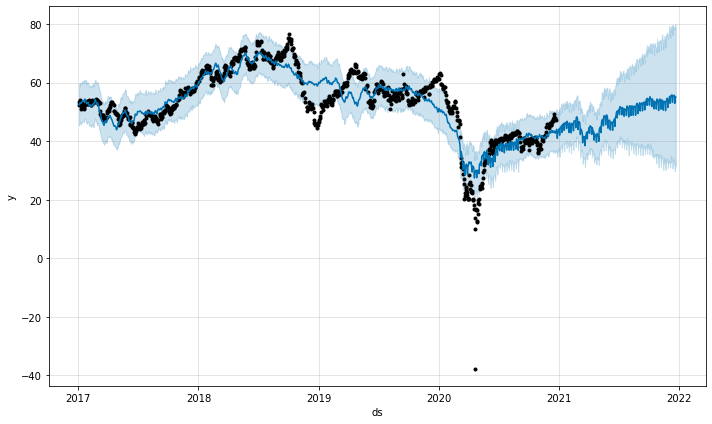

In [ ]:
# use a model with additive seasonal and trend components
model_prophet=Prophet(seasonality_mode='additive')
# add a seasonality for monthly variability
model_prophet.add_seasonality(name="monthly",period=30.5,fourier_order=5)
# fit the model
model_prophet.fit(cl)

# now forecast for the next 365 days
df_future=model_prophet.make_future_dataframe(periods=365)
# make the prediction 
df_pred=model_prophet.predict(df_future)
# plot the results
model_prophet.plot(df_pred);

Populating the interactive namespace from numpy and matplotlib


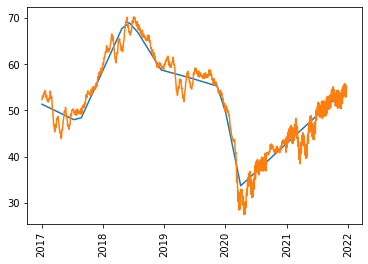

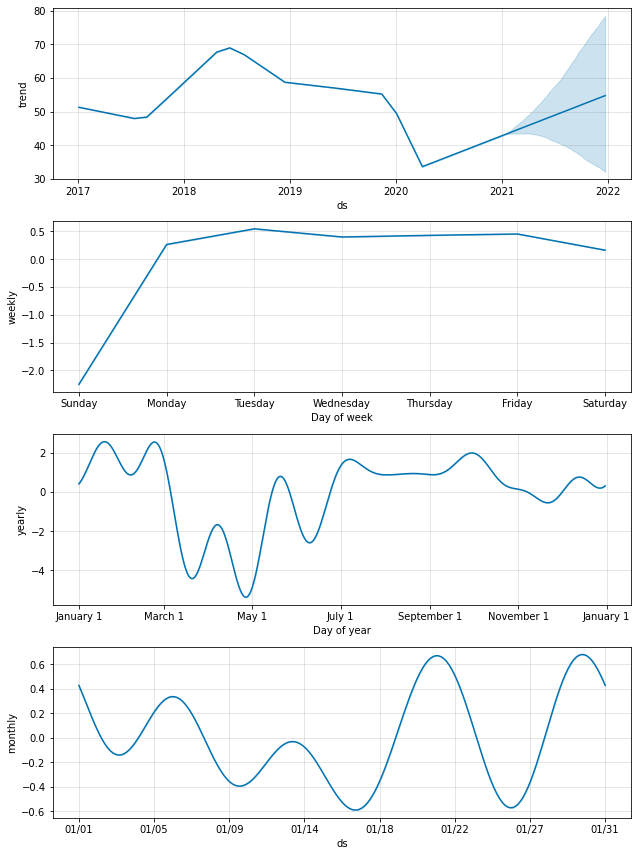

In [ ]:
# if you want you can see different components of your forecasts
%pylab inline
xticks(rotation=90)
plot(df_pred.ds,df_pred.trend)
#plot(df_pred.ds,df_pred.additive_terms)
plot(df_pred.ds,df_pred.trend+df_pred.additive_terms)
model_prophet.plot_components(df_pred);

In [ ]:
df_pred.monthly

0      -0.125752
1      -0.085279
2       0.129604
3       0.314735
4      -0.215908
          ...   
1377   -0.031205
1378   -0.144020
1379   -0.371651
1380   -0.559663
1381   -0.563059
Name: monthly, Length: 1382, dtype: float64

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


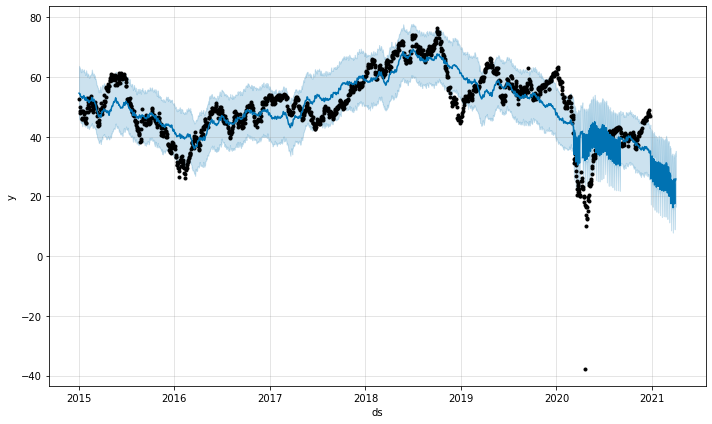

In [ ]:
# now the whole code

# change only these 3 variables 
data_start_date=datetime.datetime(2015, 1, 1)  # 2017 January 1
commodity = "CL=F"
forward_dates=100
# CL=F crude oil, TTF=F natural gas EU, TRY=X TL, GC=F gold, MTF=F coal , lpg B0F21.NYM
# use https://finance.yahoo.com/commodities

# This code will do the rest
cl = pdr.DataReader(commodity, 'yahoo', data_start_date)
cl["Date"]=cl.index
cl=cl.rename(columns={'Date':'ds','Close':'y'})
model_prophet=Prophet(seasonality_mode='additive')
model_prophet.add_seasonality(name="monthly",period=30.5,fourier_order=5)
model_prophet.fit(cl)
df_future=model_prophet.make_future_dataframe(periods=forward_dates)
df_pred=model_prophet.predict(df_future)
model_prophet.plot(df_pred);


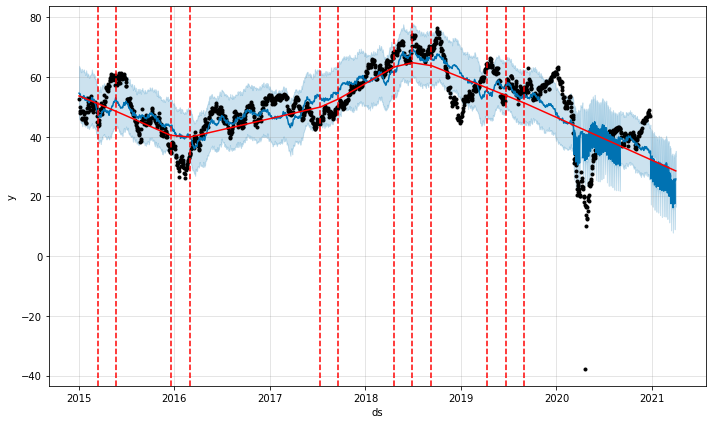

In [ ]:
# as a bonus you can also plot trend changing points
from fbprophet.plot import add_changepoints_to_plot
fig_cl=model_prophet.plot(df_pred);
a=add_changepoints_to_plot(fig_cl.gca(),model_prophet,df_pred)